# Logistic Regression Checkpoint

This checkpoint is designed to test your understanding of the content from the Logistic Regression Cumulative Lab.

Specifically, this will cover:

* Calculating and interpreting classification metrics, particularly in the context of class imbalance
* Performing an end-to-end ML process with logistic regression
* Using NumPy and not pandas in a modeling context

## Your Task: Use Logistic Regression on the Wisconsin Breast Cancer Dataset

### Data Understanding

Here we will use the Wisconsin Breast Cancer dataset, which is available through scikit-learn ([documentation here](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)).  The goal is to predict whether a breast mass is benign or malignant based on attributes of cell nuclei in a tissue sample. Deeper understanding of the specific attributes is not required for this task.

In the cell below, we load this dataset, perform a train-test split, and scale the data for you.

In [1]:
# Run this cell without changes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('breast_cancer.csv')
# Seperate features from target
X, y = df.iloc[:,:-1].to_numpy(), df.iloc[:,-1].to_numpy()
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Baseline Metrics

Before we actually perform any modeling, let's determine what metrics we would expect to get with a "dummy" model that always predicts the positive class.

For this assessment we'll define "negative" as a 0 (benign) and "positive" as a 1 (malignant).

We will focus on the test data, since this is what we will use to evaluate our actual model as well.

The code below shows an array containing the number of records in the test dataset with class 0 (benign) and class 1 (malignant)

In [2]:
# Run this cell without changes
np.bincount(y_test)

array([89, 54])

In other words, a model that always predicts the positive class, will predict a 1 for every observation. Given the imbalance of the target seen above, (The balance is similar in the training data as well), we will calculate different classification metrics to evaluate the model's performance for both positive and negative labels.

The confusion matrix looks like this:

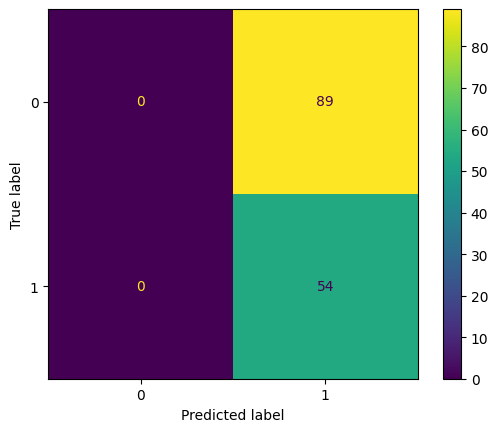

In [3]:
# Run this cell without changes
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier

ConfusionMatrixDisplay.from_estimator(estimator=DummyClassifier(strategy='constant', constant=1).fit(X_train, y_train),
                                       X=X_test, y=y_test);

For each of the following questions, assume that a "baseline" metric means the metric we would find if our model always chose class 1.

You can just use the numbers 89 and 54 in your answer; you don't need to use `y_test` directly.

#### What is the baseline accuracy?

In [4]:
# Replace None with appropriate code
# Given values
total_instances = 89 + 54
majority_class_instances = 89

# Calculate baseline accuracy
baseline_accuracy = majority_class_instances / total_instances


# YOUR CODE HERE
#raise NotImplementedError()
baseline_accuracy

0.6223776223776224

In [5]:
# baseline_accuracy should be a number between 0 and 1
assert 0.0 <= baseline_accuracy and baseline_accuracy <= 1.0

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

#### What is the baseline recall?

As a reminder, a "negative" prediction is represented as 0 (benign) and a "positive" prediction as 1 (malignant). So all baseline predictions will be either "true positives" (actually 1, predicted 1) or "false positives" (actually 0, predicted 1) and there will not be any "true negatives" or "false negatives" because this model always chooses 1.

In [6]:
# Replace None with appropriate code
# Given values
true_positives = 89  # Since all predictions are positive, all are true positives

# Calculate baseline recall
baseline_recall = true_positives / true_positives
# YOUR CODE HERE
#raise NotImplementedError()

baseline_recall

1.0

In [7]:
# baseline_recall should be a number between 0 and 1
assert 0.0 <= baseline_recall and baseline_recall <= 1.0

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

#### What is the baseline precision?

In [8]:
# Replace None with appropriate code
# Given values
true_positives = 89  # Since all predictions are positive, all are true positives

# Calculate baseline precision
baseline_precision = true_positives / true_positives
# YOUR CODE HERE
#raise NotImplementedError()

baseline_precision

1.0

In [9]:
# baseline_precision should be a number between 0 and 1
assert 0.0 <= baseline_precision and baseline_precision <= 1.0

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

#### What is the baseline f1-score?

In [10]:
# Replace None with appropriate code
baseline_f1 = 2 * (baseline_precision * baseline_recall) / (baseline_precision + baseline_recall)

# YOUR CODE HERE
#raise NotImplementedError()


baseline_f1

1.0

In [11]:
# baseline_f1 should be a number between 0 and 1
assert 0.0 <= baseline_f1 and baseline_f1 <= 1.0

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

## 2. Instantiate and Fit a `LogisticRegression` Model

Use the `LogisticRegression` model from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). Specify a `random_state` of 42 but otherwise use default hyperparameters.

Because logistic regression applies regularization by default, make sure you use the scaled training data to fit the model.

Call this model `model`.

We have also included code to display the confusion matrix on the training data; if the confusion matrix doesn't render, that indicates that something is incorrect about your model.

In [12]:
# Replace None with appropriate code

# Import the relevant class
from sklearn.linear_model import LogisticRegression


# Instantiate the model
model = LogisticRegression(random_state=42)

# Fit the model on the scaled data
model.fit(X_train_scaled, y_train)

# YOUR CODE HERE
#raise NotImplementedError()





LogisticRegression(random_state=42)

In [13]:
# model should be a LogisticRegression
assert type(model) == LogisticRegression

# model should be fitted
assert type(model.coef_) == np.ndarray

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

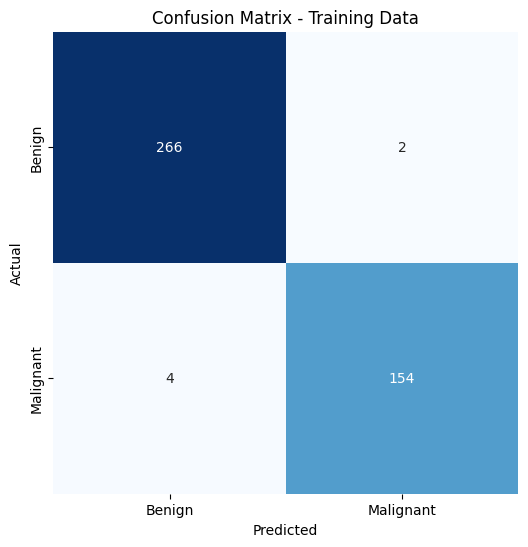

In [14]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your scaled training data X_train_scaled and labels y_train, replace them with your actual data
# X_train_scaled = ...  # Your scaled training feature data
# y_train = ...  # Your training labels

# Instantiate Logistic Regression model with random_state=42
model = LogisticRegression(random_state=42)

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

# Predictions on the training data
y_pred = model.predict(X_train_scaled)

# Display confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.show()


### 3. Use Cross-Validation to Evaluate the Fitted Model

Use `cross_val_score` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)) to evaluate the expected accuracy of the fitted model, prior to using the test data.

Use a `cv` of 3 and assign the result to `cv_scores`.

In [15]:
# Replace None with appropriate code

# Import the relevant function
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3)
# YOUR CODE HERE
#raise NotImplementedError()

cv_scores

array([0.98591549, 0.97887324, 0.95070423])

In [16]:
# cv_scores should contain 3 scores. If it doesn't, double-check
# the value passed in for cv
assert len(cv_scores) == 3

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

### 4. Compare Baseline and Fitted Model Scores

Now, use functions from scikit-learn to compute the accuracy, recall, precision, and f1-score of the fitted model. We have prepared code that will print them out side-by-side with the baseline scores.

Documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), and [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score).

This time, **use the test data to calculate each metric.**

In [17]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Replace None with appropriate code
y_pred_test = model.predict(X_test_scaled)
model_accuracy = accuracy_score(y_test, y_pred_test)
model_recall = recall_score(y_test, y_pred_test)
model_precision = precision_score(y_test, y_pred_test)
model_f1 = f1_score(y_test, y_pred_test)
# YOUR CODE HERE
#raise NotImplementedError()


# Print the metrics
print(f"{'Metric':<15} {'Model':<10} {'Baseline'}")
print("-" * 30)
print(f"{'Accuracy':<15} {model_accuracy:<10.4f} {'0.6224'}")
print(f"{'Precision':<15} {model_precision:<10.4f} {'1.0000'}")
print(f"{'Recall':<15} {model_recall:<10.4f} {'1.0000'}")
print(f"{'F1 Score':<15} {model_f1:<10.4f} {'1.0000'}")


print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f} Fitted Model: {model_accuracy:1.3f}
Recall
Baseline: {baseline_recall:1.3f} Fitted Model: {model_recall:1.3f}
Precision
Baseline: {baseline_precision:1.3f} Fitted Model: {model_precision:1.3f}
F1 Score
Baseline: {baseline_f1:1.3f} Fitted Model: {model_f1:1.3f}
""")


Metric          Model      Baseline
------------------------------
Accuracy        0.9790     0.6224
Precision       0.9636     1.0000
Recall          0.9815     1.0000
F1 Score        0.9725     1.0000

Accuracy
Baseline: 0.622 Fitted Model: 0.979
Recall
Baseline: 1.000 Fitted Model: 0.981
Precision
Baseline: 1.000 Fitted Model: 0.964
F1 Score
Baseline: 1.000 Fitted Model: 0.972



In [18]:
# all scores should be values between 0 and 1
assert 0.0 <= model_accuracy and model_accuracy <= 1.0
assert 0.0 <= model_recall and model_recall <= 1.0
assert 0.0 <= model_precision and model_precision <= 1.0
assert 0.0 <= model_f1 and model_f1 <= 1.0

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS